In [4]:
# Importing the Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Import Dataset

In [5]:
# Load the Dataset in DataFrame using Pandas
df = pd.read_csv("/content/BDOShoham.csv")
df

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.30000,0.0250,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.00000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.30000,0.0400,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.00000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.30000,0.0630,0.001,0.00002,1000,1.8,0.07,0.0,0.051
...,...,...,...,...,...,...,...,...,...,...
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


Exploratory Data Analysis

In [6]:
#Statictical obseravtions
df.describe()

,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


In [7]:
# Finding the Null Values

df.isnull().sum()

FlowPattern    0
Vsl            0
Vsg            0
VisL           0
VisG           0
DenL           0
DenG           0
ST             0
Ang            0
ID             0
dtype: int64

In [8]:
# Finding the Target values
df["FlowPattern"].value_counts()


5    2905
4    1033
3     878
1     594
2     140
7     125
Name: FlowPattern, dtype: int64

In [9]:
# Displaying the Columns in the Dataset
df.columns

Index(['FlowPattern', 'Vsl', 'Vsg', 'VisL', 'VisG', 'DenL', 'DenG', 'ST',
       'Ang', 'ID'],
      dtype='object')

In [10]:
#Dropping the Traget columnand unwanted columns and storing the remaining columns in X variable
X = df.drop(["FlowPattern","VisL","VisG","DenL","DenG","ST","ID"],axis = 1)
X

,Vsl,Vsg,Ang
0,6.30000,0.0250,0.0
1,4.00000,0.0400,0.0
2,6.30000,0.0400,0.0
3,4.00000,0.0630,0.0
4,6.30000,0.0630,0.0
...,...,...,...
5670,2.70096,15.8561,-80.0
5671,1.58784,15.8394,-80.0
5672,1.05338,16.0692,-80.0
5673,1.05397,25.7439,-80.0


In [11]:
# Storing the Traget the value in Y-variable
y = df["FlowPattern"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5670    5
5671    5
5672    5
5673    5
5674    5
Name: FlowPattern, Length: 5675, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


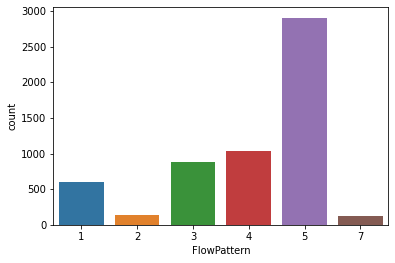

In [12]:
sns.countplot(df["FlowPattern"])

Validation

In [13]:
# Spliting the X and Y into Train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 2,test_size= 0.3)

In [14]:
# Shape of the Dataset
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3972, 3), (1703, 3), (3972,), (1703,))

In [15]:
# Using Logistic Regresssion model for Evaluation
model = LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
pred = model.predict(X_test)
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

0.6594245449207281
              precision    recall  f1-score   support

           1       0.59      0.82      0.69       137
           2       0.00      0.00      0.00         0
           3       0.13      0.28      0.17       115
           4       0.62      0.66      0.64       280
           5       0.88      0.68      0.77      1138
           7       0.44      0.52      0.47        33

    accuracy                           0.66      1703
   macro avg       0.44      0.49      0.46      1703
weighted avg       0.76      0.66      0.70      1703

[[113   0   2   0  22   0]
 [  0   0   0   0   0   0]
 [  1   0  32  43  39   0]
 [  1   0  70 185  24   0]
 [ 75  44 150  71 776  22]
 [  0   0   0   0  16  17]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross_validation for Logisitic Regression

In [44]:
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=3)
print("Cross Validation Scores are {}:".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Cross Validation Scores are [0.65697674 0.65063425 0.65732417]:
Average Cross Validation score :0.6549783869216186


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


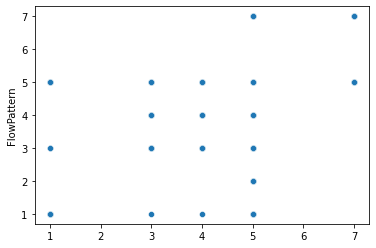

In [17]:
sns.scatterplot(pred,y_test)

In [36]:
#Using KNNClassifier with one Hyperparameter
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X,y)
predict = kn.predict(X_test)
print(accuracy_score(predict,y_test))
print(classification_report(predict,y_test))
print(confusion_matrix(predict,y_test))

0.9365825014679976
              precision    recall  f1-score   support

           1       0.90      0.90      0.90       191
           2       0.93      0.93      0.93        44
           3       0.95      0.92      0.93       263
           4       0.92      0.91      0.92       303
           5       0.94      0.97      0.95       858
           7       0.97      0.86      0.92        44

    accuracy                           0.94      1703
   macro avg       0.94      0.91      0.92      1703
weighted avg       0.94      0.94      0.94      1703

[[171   0   1   0  18   1]
 [  0  41   2   0   1   0]
 [  1   1 241  13   7   0]
 [  0   0  10 276  17   0]
 [ 18   2   0  10 828   0]
 [  0   0   0   0   6  38]]


In [46]:
score=cross_val_score(neigh,X,y,cv=3)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.80232558 0.68181818 0.77472237]
Average Cross Validation score :0.7529553774434667


In [47]:
#Using KNNClassifier Model using Hyperparameters
neigh = KNeighborsClassifier(n_neighbors=3,weights= "uniform",metric="minkowski")
neigh.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [38]:
prediction = neigh.predict(X_test)
print(accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))
print(confusion_matrix(prediction,y_test))

0.9365825014679976
              precision    recall  f1-score   support

           1       0.90      0.90      0.90       191
           2       0.93      0.93      0.93        44
           3       0.95      0.92      0.93       263
           4       0.92      0.91      0.92       303
           5       0.94      0.97      0.95       858
           7       0.97      0.86      0.92        44

    accuracy                           0.94      1703
   macro avg       0.94      0.91      0.92      1703
weighted avg       0.94      0.94      0.94      1703

[[171   0   1   0  18   1]
 [  0  41   2   0   1   0]
 [  1   1 241  13   7   0]
 [  0   0  10 276  17   0]
 [ 18   2   0  10 828   0]
 [  0   0   0   0   6  38]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


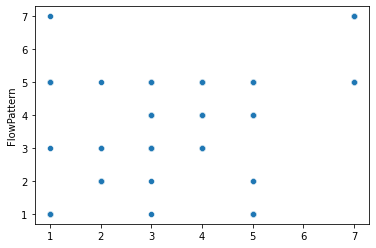

In [40]:
sns.scatterplot(prediction,y_test)